**RM 98827 - André Coelho Solér**

**RM 99389 - Victor Flávio Demarchi Viana**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

**Lendo o arquivo CSV**

In [26]:
dados=pd.read_csv('death.csv', encoding='utf-8')
dados

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
...,...,...,...,...,...,...,...,...,...,...,...
3136,"Yakutat City and Borough, Alaska<sup>3</sup>",2282,*,*,*,*,*,**,**,**,**
3137,"Yukon-Koyukuk Census Area, Alaska",2290,*,*,*,*,*,**,**,**,**
3138,"Zapata County, Texas",48505,*,*,*,*,*,*,*,*,*
3139,"Zavala County, Texas",48507,*,*,*,*,*,**,**,**,**


In [27]:
print(dados.head())
print(dados.shape)

                        County   FIPS Met Objective of 45.5? (1)  \
0                United States      0                         No   
1       Perry County, Kentucky  21193                         No   
2      Powell County, Kentucky  21197                         No   
3  North Slope Borough, Alaska   2185                         No   
4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0                                         46.1                 157,376  

In [28]:
print(dados.dtypes)

County                                          object
FIPS                                             int64
Met Objective of 45.5? (1)                      object
Age-Adjusted Death Rate                         object
Lower 95% Confidence Interval for Death Rate    object
Upper 95% Confidence Interval for Death Rate    object
Average Deaths per Year                         object
Recent Trend (2)                                object
Recent 5-Year Trend (2) in Death Rates          object
Lower 95% Confidence Interval for Trend         object
Upper 95% Confidence Interval for Trend         object
dtype: object


In [157]:
dados_tratados = dados
lista_deletar = []

# Tratando valores nulos na tabela
for linha in range(0, len(dados_tratados)):
    for elemento in dados_tratados.values[linha]:
        if '*' in str(elemento):
            lista_deletar.append(linha)

dados_tratados = dados_tratados.drop(lista_deletar)

# Separando os dados de Taxa de Mortalidade nos últimos 5 anos
taxa_mortalidade_5anos = dados_tratados['Recent 5-Year Trend (2) in Death Rates'].values

# Calculando o tamanho da lista de dados, e dividing pela metade
metade_lista_taxa = int(len(taxa_mortalidade_5anos) / 2)

# Dividindo os dados em 2 listas
X = taxa_mortalidade_5anos[:metade_lista_taxa]
Y = taxa_mortalidade_5anos[metade_lista_taxa:]

# Pegando o tamanho das listas X e Y e dividindo por 2
metade_lista_x = int(len(X) / 2)
metade_lista_y = int(len(Y) / 2)

**Realizando os cálculos de regressão linear**

In [168]:
# Separando os dados de X pela metade, uma para treino e outra para teste
X_train = X[:metade_lista_x]
X_test = X[metade_lista_x:]

# Separando os dados de Y pela metade, uma para treino e outra para teste
y_train = Y[:metade_lista_y]
y_test = Y[metade_lista_y:]

# Cria o objeto de regressão linear
regr = LinearRegression()

# Treina o modelo usando os dados feitos
regr.fit(X_train[:, np.newaxis], y_train)

# Faz previsões com base nos testes
dados_previsao = regr.predict(X_test[:, np.newaxis])

**Montando o gráfico**

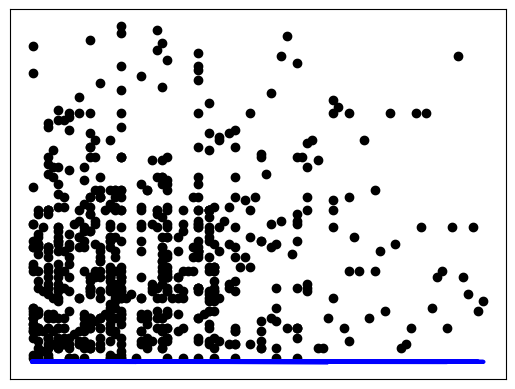

In [169]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, dados_previsao, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()